In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import joblib

In [4]:
#Load the dataset
file_path = "./UAVNet-Defense Comprehensive UAV Network Traffic Dataset.csv"
df = pd.read_csv(file_path)

In [5]:
# Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlowID           42795 non-null  int64  
 1   FlowDuration/s   42795 non-null  float64
 2   SrcAddr          42795 non-null  object 
 3   SrcPort          42795 non-null  int64  
 4   DstAddr          42795 non-null  object 
 5   DstPort          42795 non-null  int64  
 6   Protocol         42795 non-null  object 
 7   TxPackets        42795 non-null  int64  
 8   RxPackets        42795 non-null  int64  
 9   LostPackets      42795 non-null  int64  
 10  TxBytes          42795 non-null  int64  
 11  RxBytes          42795 non-null  int64  
 12  TxPacketRate/s   42795 non-null  float64
 13  RxPacketRate/s   42795 non-null  float64
 14  TxByteRate/s     42795 non-null  float64
 15  RxByteRate/s     42795 non-null  float64
 16  MeanDelay/s      42795 non-null  float64
 17  MeanJitter/s

In [ ]:
class_counts = np.bincount(y_test_classes)
class_names = label_encoder.classes_

# Create a DataFrame for better display
sample_counts_df = pd.DataFrame({
    "Class": class_names,
    "Sample Count": class_counts
})

# Display the sample counts
print(sample_counts_df)

# Optional: Plot a bar chart of sample counts
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Sample Count per Class", fontsize=16, fontweight='bold')
plt.xlabel("Class", fontsize=14)
plt.ylabel("Sample Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
df.describe()

,FlowID,FlowDuration/s,SrcPort,DstPort,TxPackets,RxPackets,LostPackets,TxBytes,RxBytes,TxPacketRate/s,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount
count,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,4.279500e+04,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000,42795.000000
mean,1903.091202,251.607823,534.118472,534.118472,82.004977,66.851034,15.204860,5491.006660,4534.988760,185.994540,150.057494,8.205364e+03,6305.317512,0.094185,0.045292,50.442537,49.401379,0.146246,0.047173
std,2359.276296,1281.280554,250.905313,250.905313,237.733751,210.306301,100.336817,17858.237802,15828.187165,1414.225849,957.370313,6.389253e+04,42106.287683,0.247669,0.099880,336.850254,13.484742,0.237723,0.288352
min,1.000000,0.000058,9.000000,9.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.004928,0.000000,3.744930e-01,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,401.000000,2.142470,654.000000,654.000000,4.000000,3.000000,0.000000,156.000000,144.000000,0.183651,0.153718,8.442860e+00,8.021890,0.003009,0.001234,0.064175,42.000000,0.000000,0.000000
50%,797.000000,25.998800,654.000000,654.000000,11.000000,9.000000,0.000000,510.000000,384.000000,0.966684,0.751167,4.340340e+01,33.138700,0.008103,0.005042,0.265109,46.000000,0.000000,0.000000
75%,2683.000000,143.590500,654.000000,654.000000,42.000000,26.000000,6.000000,2000.000000,1440.000000,4.111310,2.704705,1.886930e+02,118.323000,0.071624,0.049055,0.946585,48.000000,0.210526,0.000000
max,11618.000000,14390.000000,654.000000,654.000000,6020.000000,5752.000000,2148.000000,457520.000000,437152.000000,121114.000000,17134.700000,5.308840e+06,822467.000000,4.507110,3.013070,6579.740000,76.000000,1.033280,41.000000


In [6]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 FlowID             0
FlowDuration/s     0
SrcAddr            0
SrcPort            0
DstAddr            0
DstPort            0
Protocol           0
TxPackets          0
RxPackets          0
LostPackets        0
TxBytes            0
RxBytes            0
TxPacketRate/s     0
RxPacketRate/s     0
TxByteRate/s       0
RxByteRate/s       0
MeanDelay/s        0
MeanJitter/s       0
Throughput/Kbps    0
MeanPacketSize     0
PacketDropRate     0
AverageHopCount    0
label              0
dtype: int64


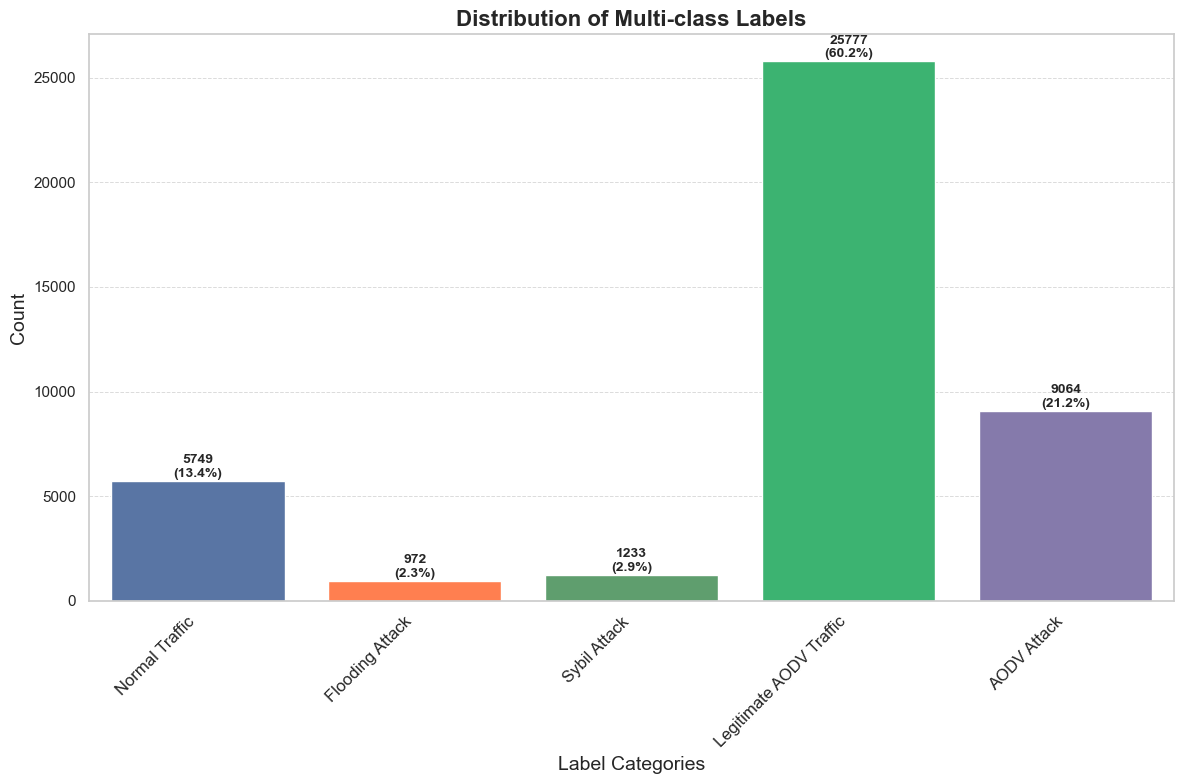

In [8]:
# Visualize the distribution of multi-class labels.
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

barplot = sns.countplot(data=df, x="label", hue="label", dodge=False, legend=False)

plt.title("Distribution of Multi-class Labels", fontsize=16, fontweight='bold')
plt.xlabel("Label Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

total = len(df)
for p in barplot.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    barplot.annotate(f'{count}\n({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), 
                     textcoords='offset points', fontsize=10, fontweight='bold')

max_height = max([p.get_height() for p in barplot.patches])
min_height = min([p.get_height() for p in barplot.patches])

for p in barplot.patches:
    if p.get_height() == max_height:
        p.set_facecolor('mediumseagreen')
    elif p.get_height() == min_height:
        p.set_facecolor('coral')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.savefig("Distribution_of_multi-class_labels.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
#Data Preprocessing

In [12]:
# Drop missing values
df = df.dropna()

In [14]:
# Encode multi-class labels using LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

In [16]:
# Display the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'AODV Attack': 0, 'Flooding Attack': 1, 'Legitimate AODV Traffic': 2, 'Normal Traffic': 3, 'Sybil Attack': 4}


In [18]:
# Encode the 'Protocol' feature using LabelEncoder
protocol_encoder = LabelEncoder()
df["Protocol"] = protocol_encoder.fit_transform(df["Protocol"])

In [20]:
# Display the mapping of protocol values
protocol_mapping = dict(zip(protocol_encoder.classes_, range(len(protocol_encoder.classes_))))
print("Protocol Mapping:", protocol_mapping)

Protocol Mapping: {'UDP': 0}


In [22]:
# Define feature columns and label column
feature_columns = [
    "FlowDuration/s", "SrcPort", "DstPort", "Protocol",
    "TxPackets", "RxPackets", "LostPackets", "TxBytes", "RxBytes",
    "TxPacketRate/s", "RxPacketRate/s", "TxByteRate/s", "RxByteRate/s",
    "MeanDelay/s", "MeanJitter/s", "Throughput/Kbps",
    "MeanPacketSize", "PacketDropRate", "AverageHopCount"
]
label_column = "label"


In [24]:
# Standardize features with RobustScaler
scaler = RobustScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [26]:
# Prepare features (X) and labels (y)
X = df[feature_columns]
y = df[label_column]

In [28]:
# Split the data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
#Model Training

In [32]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [34]:
# Initialize Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring='accuracy')

In [37]:
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

In [38]:
# Display the cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")

Cross-Validation Accuracy Scores: [0.96810375 0.96810375 0.96284613 0.96670172 0.9689216 ]
Mean Accuracy: 0.9669
Standard Deviation: 0.0022


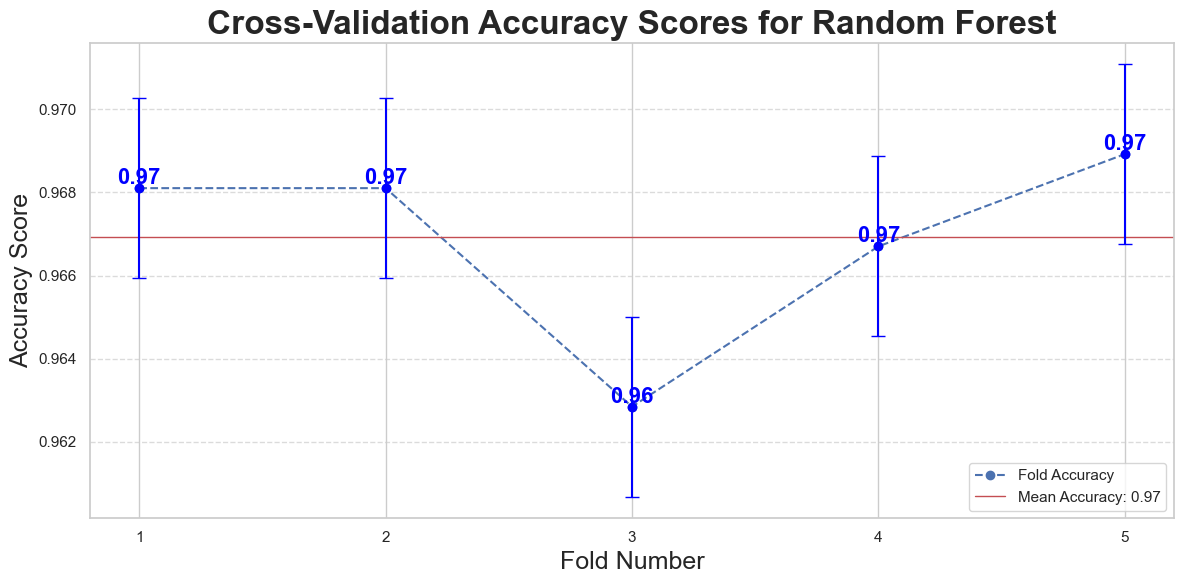

In [39]:
# Plot Cross-Validation Accuracy Scores.
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', color='b', label="Fold Accuracy")
plt.axhline(mean_accuracy, color='r', linestyle='-', linewidth=1, label=f"Mean Accuracy: {mean_accuracy:.2f}")

plt.title("Cross-Validation Accuracy Scores for Random Forest", fontsize=24, fontweight='bold')
plt.xlabel("Fold Number", fontsize=18)
plt.ylabel("Accuracy Score", fontsize=18)

plt.xticks(range(1, len(cv_scores) + 1))

for i, score in enumerate(cv_scores, 1):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', fontsize=16, fontweight='bold', color='blue')

plt.errorbar(range(1, len(cv_scores) + 1), cv_scores, yerr=std_accuracy, fmt='o', color='blue', capsize=5)

plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("cross_validation_accuracy_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

In [40]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [41]:
# Tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [42]:
# Best model after Grid Search.
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [43]:
# Generate learning curve data.
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [44]:
# Calculate mean and standard deviation of training and validation scores.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

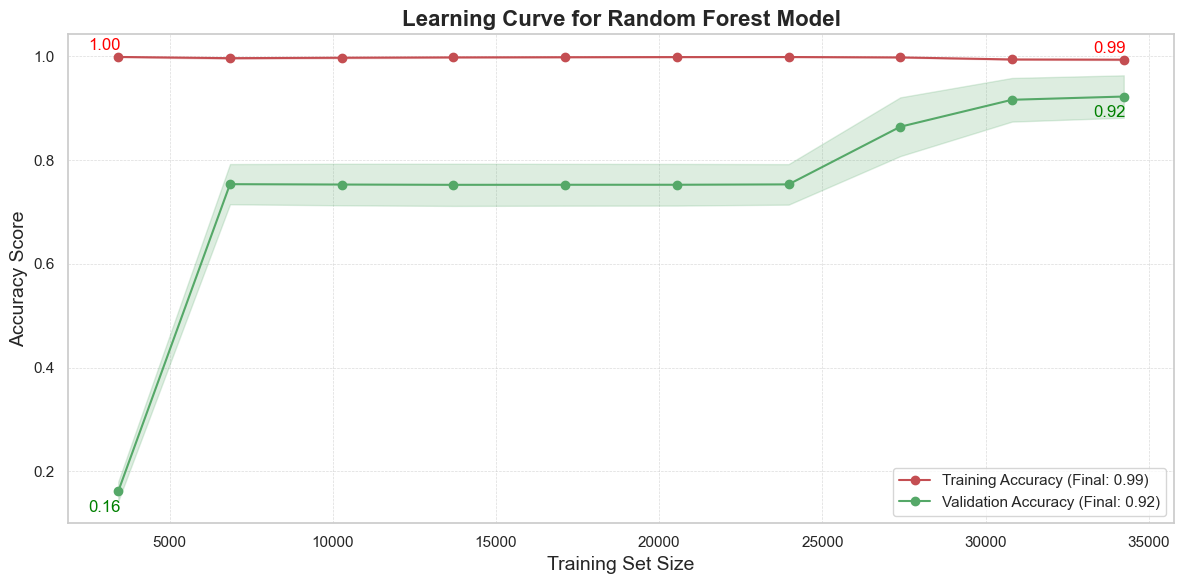

In [61]:
# Plot the Learning Curve.
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label=f"Training Accuracy (Final: {train_scores_mean[-1]:.2f})")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")

plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label=f"Validation Accuracy (Final: {val_scores_mean[-1]:.2f})")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="g")

plt.title("Learning Curve for Random Forest Model", fontsize=16, fontweight='bold')
plt.xlabel("Training Set Size", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

plt.annotate(f"{train_scores_mean[0]:.2f}", (train_sizes[0], train_scores_mean[0]), textcoords="offset points", xytext=(-10,5), ha='center', color="red")
plt.annotate(f"{val_scores_mean[0]:.2f}", (train_sizes[0], val_scores_mean[0]), textcoords="offset points", xytext=(-10,-15), ha='center', color="green")
plt.annotate(f"{train_scores_mean[-1]:.2f}", (train_sizes[-1], train_scores_mean[-1]), textcoords="offset points", xytext=(-10,5), ha='center', color="red")
plt.annotate(f"{val_scores_mean[-1]:.2f}", (train_sizes[-1], val_scores_mean[-1]), textcoords="offset points", xytext=(-10,-15), ha='center', color="green")

plt.legend(loc="best")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("learning_curve_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

In [62]:
#Model Evaluation

In [63]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

In [64]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

In [68]:
# Get the unique labels present in y_test
unique_labels = np.unique(y_test)

In [71]:
class_names = label_encoder.inverse_transform(unique_labels)

In [73]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

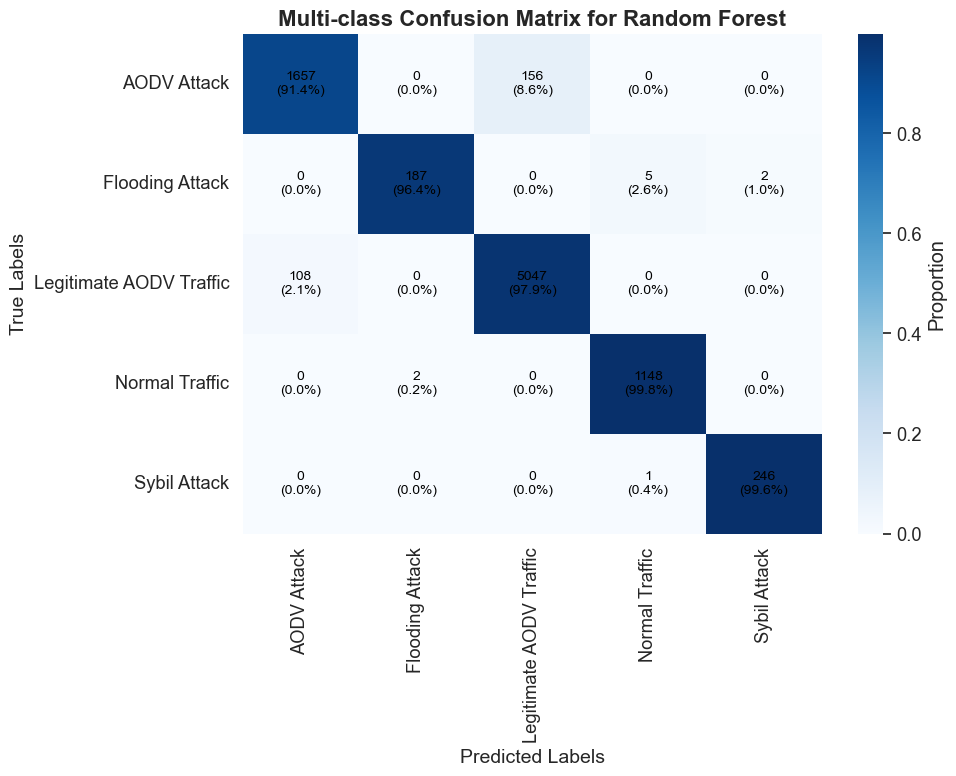

In [83]:
normalize = True
if normalize:
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
else:
    conf_matrix_normalized = conf_matrix

# Plot the confusion matrix with the "Blues" color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f' if normalize else 'd', cmap='Blues', 
                      xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Proportion' if normalize else 'Count'})

# Add titles and labels
plt.title("Multi-class Confusion Matrix for Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Annotate each cell with count and percentage on separate lines
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        count = conf_matrix[i, j]
        if normalize:
            percentage = conf_matrix_normalized[i, j] * 100
            annotation = f"{count}\n({percentage:.1f}%)"  # Count on the first line, percentage on the second
        else:
            annotation = f"{count}"  # Just the count if not normalized
        heatmap.text(j + 0.5, i + 0.5, annotation, ha='center', va='center', color="black", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig("normalized_confusion_matrix_random_forest.png", dpi=300)
plt.show()

In [85]:
# Multi-class Classification Report.
print("\nMulti-class Classification Report:")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.inverse_transform(unique_labels)))


Multi-class Classification Report:
                         precision    recall  f1-score   support

            AODV Attack       0.94      0.91      0.93      1813
        Flooding Attack       0.99      0.96      0.98       194
Legitimate AODV Traffic       0.97      0.98      0.97      5155
         Normal Traffic       0.99      1.00      1.00      1150
           Sybil Attack       0.99      1.00      0.99       247

               accuracy                           0.97      8559
              macro avg       0.98      0.97      0.97      8559
           weighted avg       0.97      0.97      0.97      8559



In [87]:
# Overall Accuracy Score.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy Score: {accuracy:.4f}")


Overall Accuracy Score: 0.9680


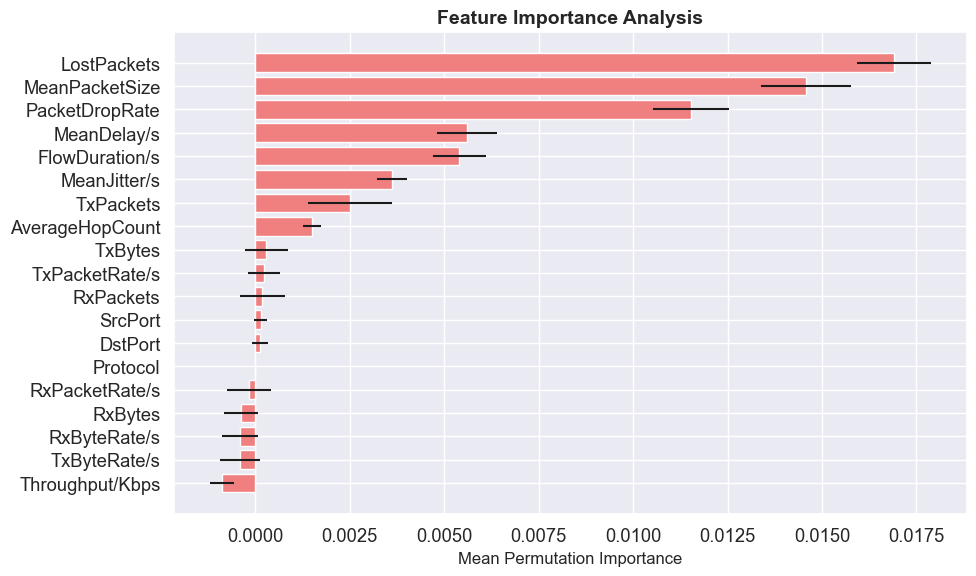

In [105]:
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Get the sorted indices of features based on importance
sorted_idx = np.argsort(perm_importance.importances_mean)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_columns)[sorted_idx], perm_importance.importances_mean[sorted_idx], 
         xerr=perm_importance.importances_std[sorted_idx], color='lightcoral')
plt.xlabel("Mean Permutation Importance", fontsize=12)
plt.title("Feature Importance Analysis", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("feature_importance_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [90]:
# Save the trained model
model_filename = "random_forest_multiclass_model.pkl"
joblib.dump(best_rf_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_multiclass_model.pkl


In [91]:
# Load the model for predictions
loaded_model = joblib.load(model_filename)

In [92]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

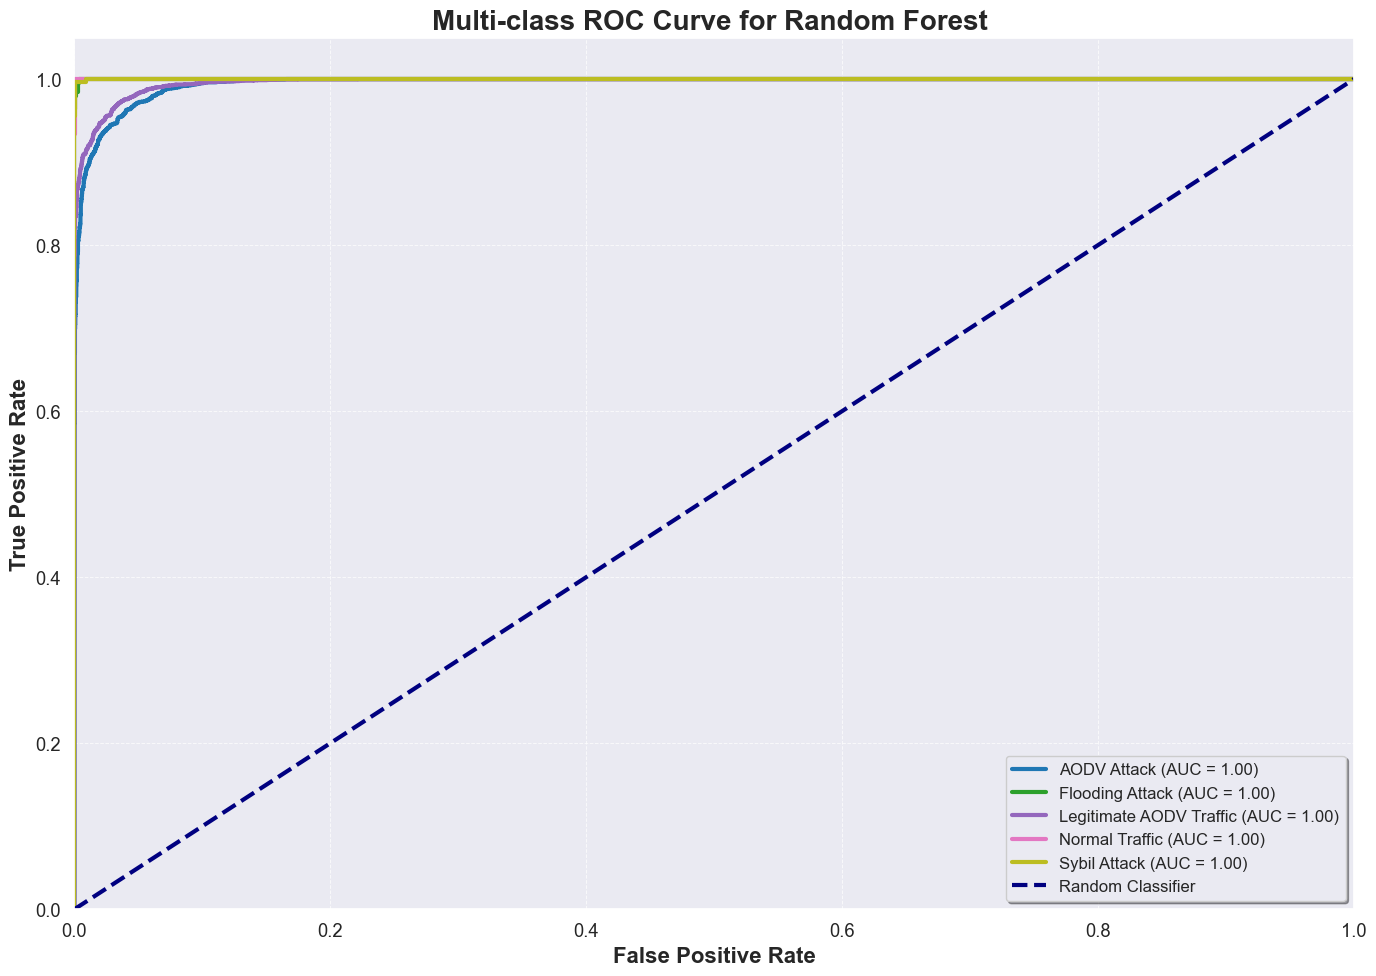

In [101]:
y_score = best_rf_model.predict_proba(X_test)
plt.figure(figsize=(14, 10))

cmap = plt.colormaps['tab20'] 
colors = [cmap(i / n_classes) for i in range(n_classes)]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, color=colors[i], label=f"{label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--", label="Random Classifier")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=16, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=16, fontweight='bold')
plt.title("Multi-class ROC Curve for Random Forest ", fontsize=20, fontweight='bold')

plt.legend(loc="lower right", fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig("multi_class_roc_curve_random_forest.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()